##### Python for High School (Summer 2022)

* [Table of Contents](PY4HS.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/Py4HS_July_26_2022.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/Py4HS_July_26_2022.ipynb)

### Logarithms

![log keys](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logarithm_keys.jpg/320px-Logarithm_keys.jpg)

[Attribution](https://commons.wikimedia.org/wiki/File:Logarithm_keys.jpg)

In this chapter we're focusing on a function key present on any scientific calculator, which, as a rule of thumb, makes it topical in high school math courses.  The "log" key is the key in question.  In Python, you could say it's opposite (or inverse) is the "pow" key (not that Python has keys, but it has functions).

In [42]:
from math import log

In [44]:
b = 8        # base (change base)
target = 10  # raise b to what power to get target? (change target)

a = log(target, b)  # in the old days, look it up in a big table 
a

1.1073093649624544

In [46]:
checking = pow(b, a)    # show that we hit the target (pretty close anyway) 
checking

10.000000000000005

However we're also talking about: 

* your ability to embed standard math notations in Jupyter Markdown cells, by means of $\LaTeX$, a way of encoding typography, and ultimately, entire books.

* your ability to plot a function, as you might on a graphing calculator, starting with data

The the idea of getting the logarithm of a number is the inverse of raising a number to a power.

Ask yourself:  "what number would I have to raise a number **b** to, to get another number **N**?"  That first number, **b** is your base, and with that you want to find the "log" (to that base) of your target number **N**.

$$
\log_{b}(N)
$$

For example, I would have to raise 10 to the 2nd power to get 100.  That means the base 10 log of 100 is 2.

$$
\log_{10}(100) = 2
$$

To what power would I need to raise the number 2 to get 10?  That's the same as asking "what is the base 2 log of 10?"

In [31]:
pow(2, 5)  ## too low

32

In [32]:
pow(2, 7)  ## too high, but closer

128

In [35]:
pow(2, 6.7)  # very close

103.96830673359815

Lets use Python to find a more precise answer:

In [47]:
from math import log

In [48]:
? log

Docstring:
log(x, [base=math.e])
Return the logarithm of x to the given base.

If the base not specified, returns the natural logarithm (base e) of x.
Type:      builtin_function_or_method


In [37]:
log(100, 2)

6.643856189774725

That's it!

$$
\log_{2}(100) \approx 6.643856189774725
$$

In [39]:
2 ** 6.643856189774725  # same as pow(2, 6.643856189774725)

100.00000000000004

In [38]:
log(100, 10)

2.0

Back in the days before electronic calculators, engineers used slide rules.  You could multiply two large numbers by adding their logarithms.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/51764518@N02/41646298500/in/pool-55459290@N00/" title="Vintage Aristo Darmstadt Slide Rule, Model 867U, Transparent Linear Scale, Back Advertising - Gildemeister &amp; Company, 6-Inch, Made In Hamburg Germany, Circa 1960s"><img src="https://live.staticflickr.com/838/41646298500_2a359d5fcc.jpg" width="500" height="281" alt="Vintage Aristo Darmstadt Slide Rule, Model 867U, Transparent Linear Scale, Back Advertising - Gildemeister &amp; Company, 6-Inch, Made In Hamburg Germany, Circa 1960s"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
[Attribution](https://flic.kr/p/26s9aBj)

For example, suppose I wanted to multiply 185 by 987.  The slide rule showed numbers as powers of some base.

In [24]:
import math
from math import log10  # Python as a special function for base 10

What power of 10 gives me 185?  

`10**2` means 10 times 10 in Python and equals 100.  

`10**3` means 10 times 10 times 10 and equals 1000.  

However we're allowed to have fractional exponents, so an exponent of 10 just a tad more than 2 should do it.

In [16]:
log10(185)

2.2671717284030137

Likewise 987 is close to 1000, so an exponent of almost 3 is not that surprising.  The log10 function figures out a precise answer.

In [17]:
log10(987)

2.9943171526696366

Now we add these two exponents...

In [18]:
log10(185) + log10(987)

5.26148888107265

... and now raise 10 to that power, to get our final answer.

On a slide rule, we could read these values (to fewer decimal places) off the sliding sticks.  

We had the results of a multiplication, but thanks to logs, we got there by addition.  Someone good with a slide rule could get precise enough answers quite quickly.

In [25]:
log_sum = log10(185) + log10(987)
pow(10, log_sum)

182594.9999999999

In [40]:
185 * 987  # checking

182595

In general:  `a * b == pow(10, log10(a) + log10(b))`

or, using our friend $\LaTeX$, the typesetting language understood by Jupyter:

$$
(A)(B) = b^{\log_b(A) + \log_{b}(B)}
$$ 

Except with floating point numbers, precise equality is not assured.  The math module has an `isclose` we can use, which means "almost equal"

In [41]:
? math.isclose

Signature: math.isclose(a, b, *, rel_tol=1e-09, abs_tol=0.0)
Docstring:
Determine whether two floating point numbers are close in value.

  rel_tol
    maximum difference for being considered "close", relative to the
    magnitude of the input values
  abs_tol
    maximum difference for being considered "close", regardless of the
    magnitude of the input values

Return True if a is close in value to b, and False otherwise.

For the values to be considered close, the difference between them
must be smaller than at least one of the tolerances.

-inf, inf and NaN behave similarly to the IEEE 754 Standard.  That
is, NaN is not close to anything, even itself.  inf and -inf are
only close to themselves.
Type:      builtin_function_or_method


In [27]:
def test_log(a, b):
    return math.isclose(a * b, pow(10, log10(a) + log10(b)))

In [28]:
test_log(185, 987)

True

In [30]:
test_log(17, 8947)

True

Before electronic calculators, the "computers" (people who computed) would use giant lookup tables, same for trig functions.

![log tables](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Abramowitz%26Stegun.page97.agr.jpg/640px-Abramowitz%26Stegun.page97.agr.jpg)

[Attribution](https://commons.wikimedia.org/wiki/File:Abramowitz%26Stegun.page97.agr.jpg)

### Plotting Logarithmic and Exponential Functions



In [69]:
import pandas as pd
import numpy as np

In [99]:
domain = np.linspace(0.1, 1000, 200) # give me 200 points between .1 and a thousand
log10_range = np.log10(domain)

In [100]:
df1 = pd.DataFrame({"Domain": domain, "Log 10": log10_range})
df1.tail()

,Domain,Log 10
195,979.901508,2.991182
196,984.926131,2.993404
197,989.950754,2.995614
198,994.975377,2.997812
199,1000.000000,3.000000


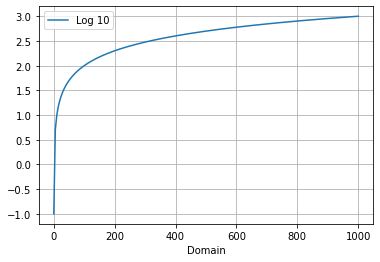

In [101]:
df1.plot(x="Domain", y="Log 10", grid=True);

In [102]:
pow_range = np.power(10, log10_range)

In [103]:
df2 = pd.DataFrame({"Domain": log10_range, "10 ** x": pow_range})
df2.head()

,Domain,10 ** x
0,-1.000000,0.100000
1,0.709662,5.124623
2,1.006434,10.149246
3,1.181096,15.173869
4,1.305319,20.198492


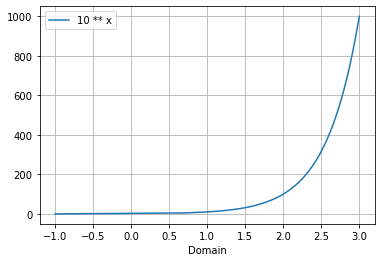

In [104]:
df2.plot(x="Domain", y="10 ** x", grid=True);

Getting a little fancier, we can put two plots into one figure, by means of subplots.  

To do this, we need to import another library that pandas has been using all along.  Now we would like to gain more control of the nitty gritty details, so we import it and talk to it directly.  About our subplots.

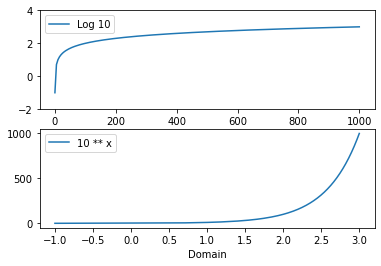

In [119]:
import matplotlib.pyplot as plt

# makes two subplots, each with its own axis object in axes
fig, axes = plt.subplots(nrows=2, ncols=1, sharey=False, sharex=False)

axes[0].set_ylim(-2, 4) # set the vertical limits on the first axis object

# df1, df2 are pandas DataFrames, which will plot on their own, but
# here we direct them to use the axis objects associated with each 
# subplot

df1.plot(x="Domain", y="Log 10",   ax=axes[0])
df2.plot(x="Domain", y="10 ** x",  ax=axes[1]);